<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/Project%206/Project_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ryan Hassell

In [3]:
import pandas as pd
import numpy as np
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")
adultDF.head()
# print info about the adult dataframe

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


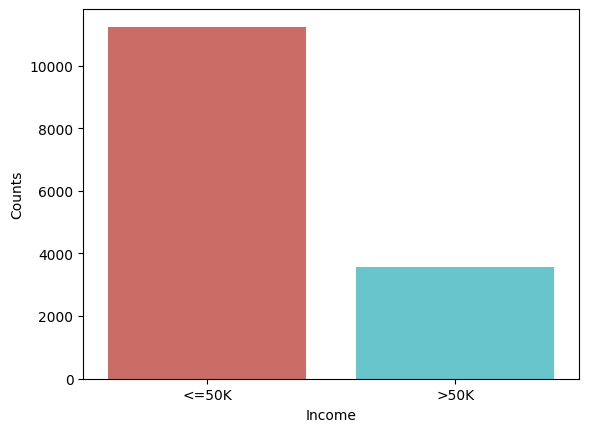

In [4]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

#Encoding Columns

In [5]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, adultDF.shape[1]):
    if adultDF.dtypes[i]=='object' or adultDF.dtypes[i]=='bool':
        encoded_adultDF[adultDF.columns[i]] = le.fit_transform(adultDF[adultDF.columns[i]])
    else:
        encoded_adultDF[adultDF.columns[i]] = adultDF[adultDF.columns[i]]

encoded_adultDF.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,6,13,2,4,1,0,0,0
1,38,4,9,0,6,1,0,0,0
2,49,4,5,3,8,0,0,0,0
3,52,6,9,2,4,1,0,0,1
4,31,4,14,4,10,0,14084,0,1
5,40,4,11,2,3,1,0,0,1
6,38,4,7,2,12,1,0,0,0
7,43,4,7,2,14,1,0,2042,0
8,54,0,10,2,0,1,0,0,1
9,39,4,9,0,4,1,0,0,0


#Training and Test Sizes

In [10]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['age','workclass','education','marital-status','occupation','sex','capital-gain','capital-loss'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [11]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 8)
Test size: (2960, 8)


#Creating the Functions

I have sourced some of this code from your guiding notebook, [Here](https://github.com/bforoura/IDS/blob/main/decision_trees.ipynb)

In [15]:
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def makeDTModel(criteria, X_train, y_train, depth, leaf_nodes):
  # create the decision tree classifier model
  treeclassifier = DecisionTreeClassifier(random_state = 56, criterion = criteria, max_leaf_nodes = leaf_nodes)
  # fit the classifier with x_train and y_train
  treeclassifier.fit(X_train, y_train)
  return treeclassifier

In [16]:
from sklearn.tree import plot_tree

def displayTree(tree_classifier, X):
    plt.figure(figsize=(10, 8))
    plot_tree(tree_classifier, feature_names=X.columns, filled=True)
    plt.show()

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def displayCM(classifier, x_train, y_train, x_test, y_test):
  cpred = classifier.predict(x_test)
  # create the confusion matrix
  cm = confusion_matrix(y_true = y_test, y_pred = cpred)
  print(cm)
  plt.figure(figsize=(8,8))

  # create the heat map
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [97]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def compareModels(cart_classifier, c5_classifier):
  # Record CART's classification accuracy on tarining and test datasets
  score = round(cart_classifier.score(X_train, y_train), 2) # training score
  score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

  # Record C5's classification accuracy on tarining and test datasets
  score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
  score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score
  labels = ['CART', 'C5']

  training_scores = [score, score3]
  testing_scores =  [score2, score4]
  # create bars
  x = np.arange(2)
  width = .45

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='pink')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='purple')

  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(loc='upper right')

  ax.set_ylabel('Accuracies')
  plt.title('Model Comparisons')
  plt.show()

#Testing my functions

Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).

Testing with leaf = 4, depth = 2

In [111]:
cart_classifier = makeDTModel("gini", X_train, y_train, leaf_nodes = 4, depth = 2)
c5_classifier = makeDTModel("entropy", X_train, y_train, leaf_nodes = 4, depth = 2)

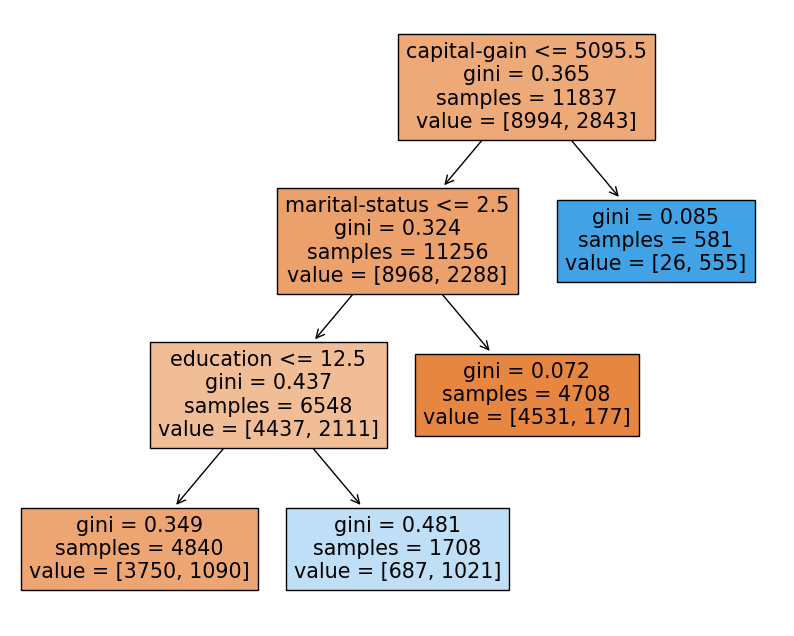

In [60]:
displayTree(cart_classifier, X)

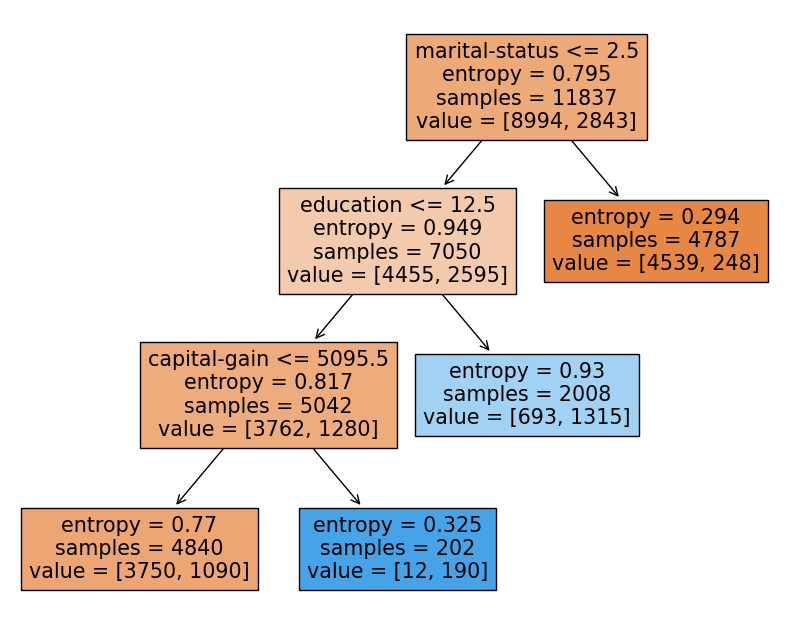

In [61]:
displayTree(c5_classifier, X)

[[2083  166]
 [ 352  359]]


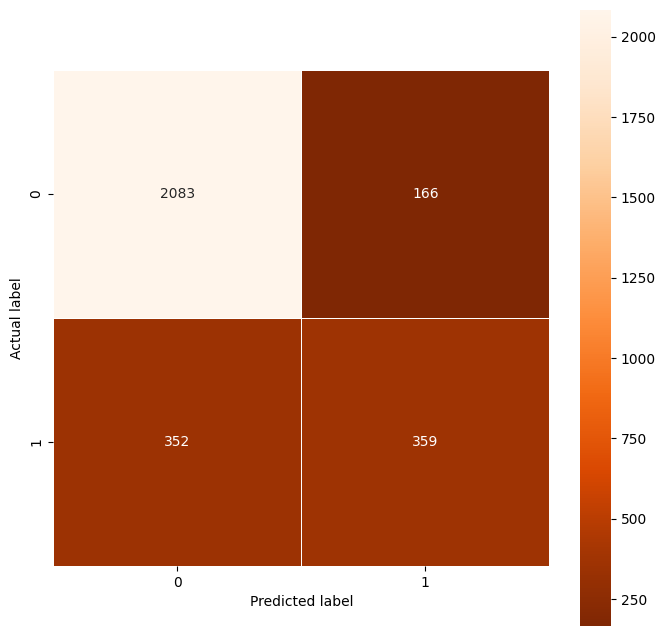

In [112]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

[[2088  161]
 [ 366  345]]


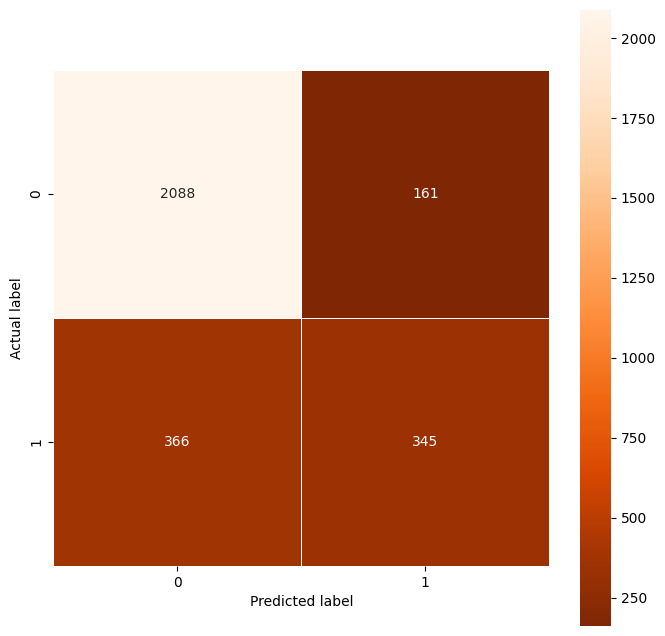

In [113]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

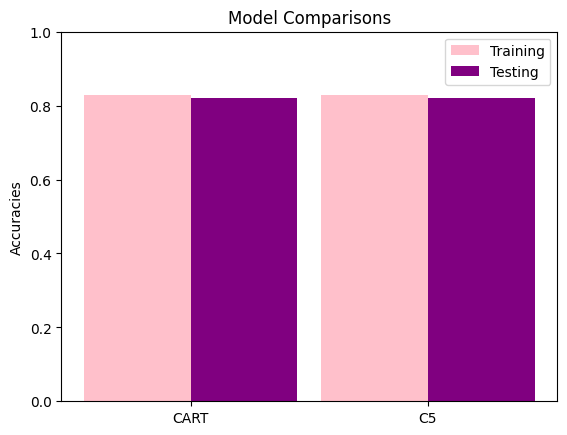

In [104]:
compareModels(cart_classifier, c5_classifier)

# None and None

I feel like generating a tree with no limits would be interesting, so let's se what happens.

In [114]:
cart_classifier = makeDTModel("gini", X_train, y_train, depth = None, leaf_nodes = None)
c5_classifier = makeDTModel("entropy", X_train, y_train, depth = None, leaf_nodes = None)

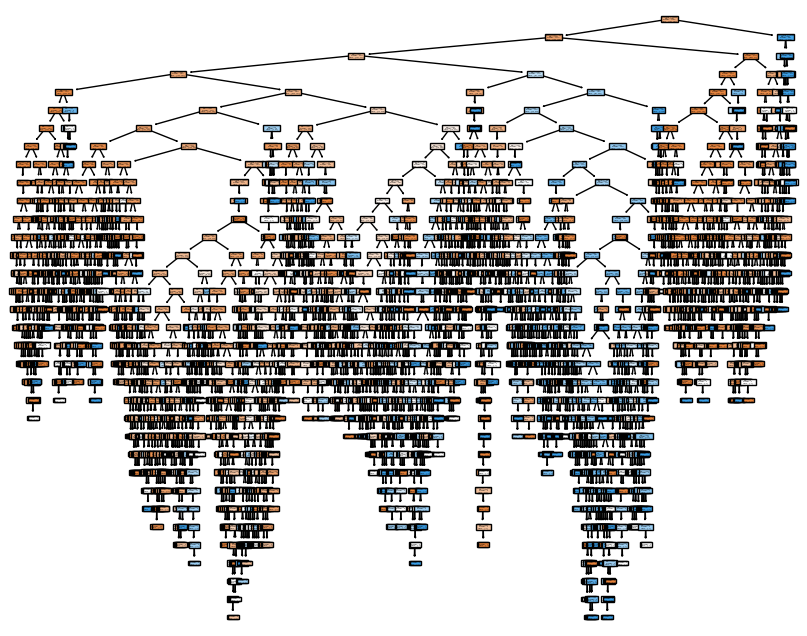

In [47]:
displayTree(cart_classifier, X)

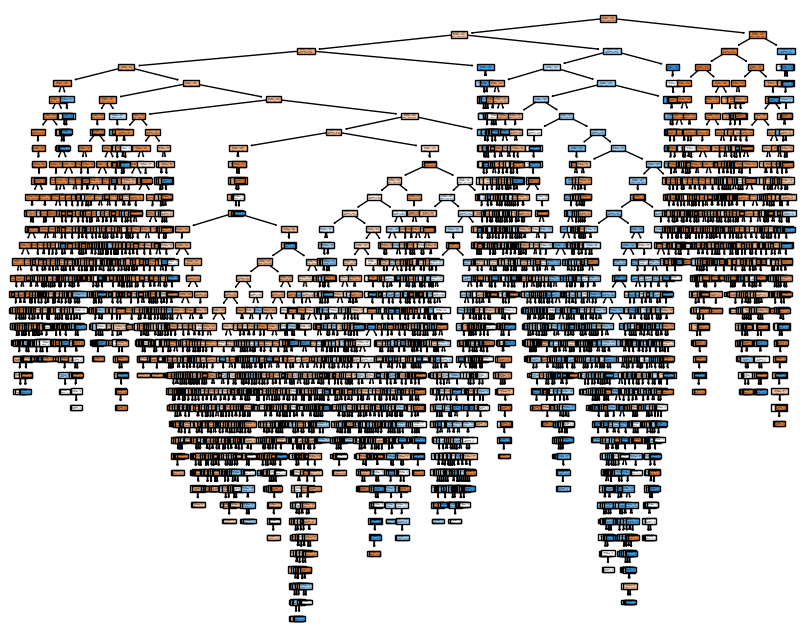

In [48]:
displayTree(c5_classifier, X)

[[2028  221]
 [ 291  420]]


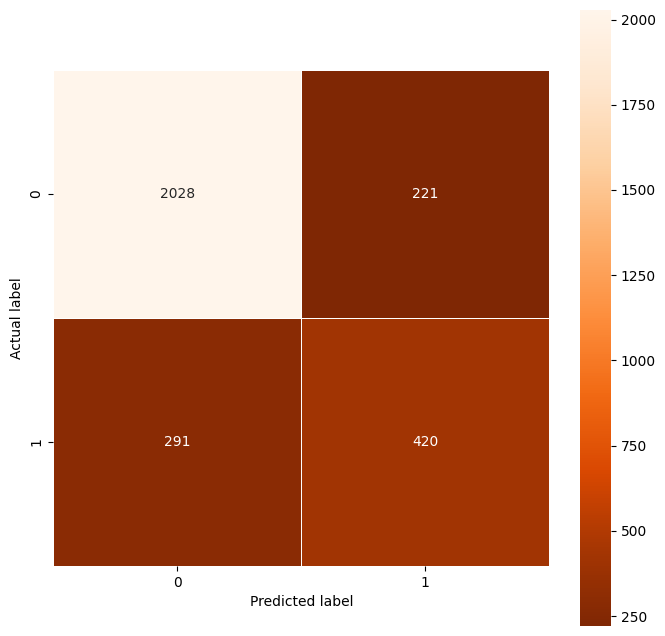

In [115]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

[[2019  230]
 [ 302  409]]


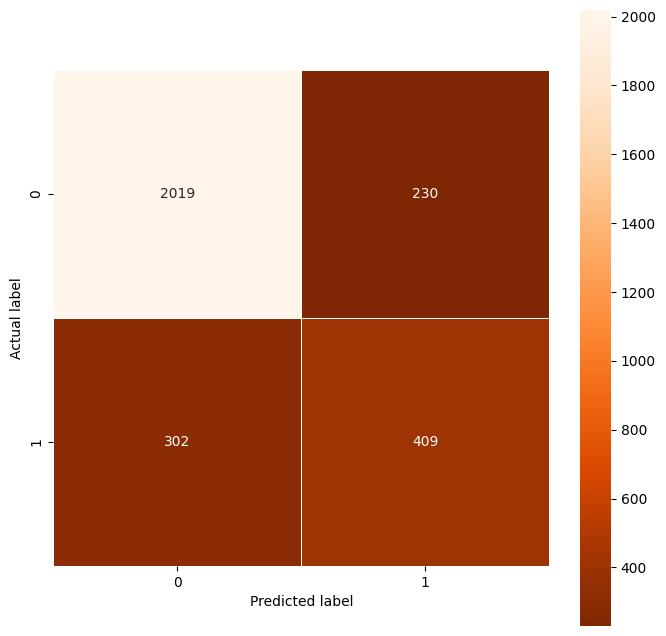

In [116]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

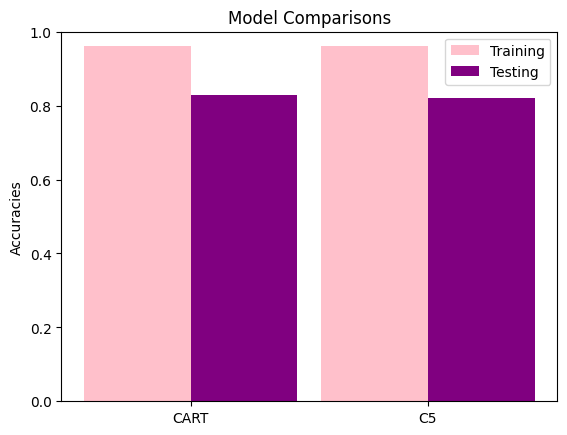

In [106]:
compareModels(cart_classifier, c5_classifier)

# 2 And 1

In [117]:
cart_classifier = makeDTModel("gini", X_train, y_train, leaf_nodes = 2, depth = 1)
c5_classifier = makeDTModel("entropy", X_train, y_train, leaf_nodes = 2, depth = 1)

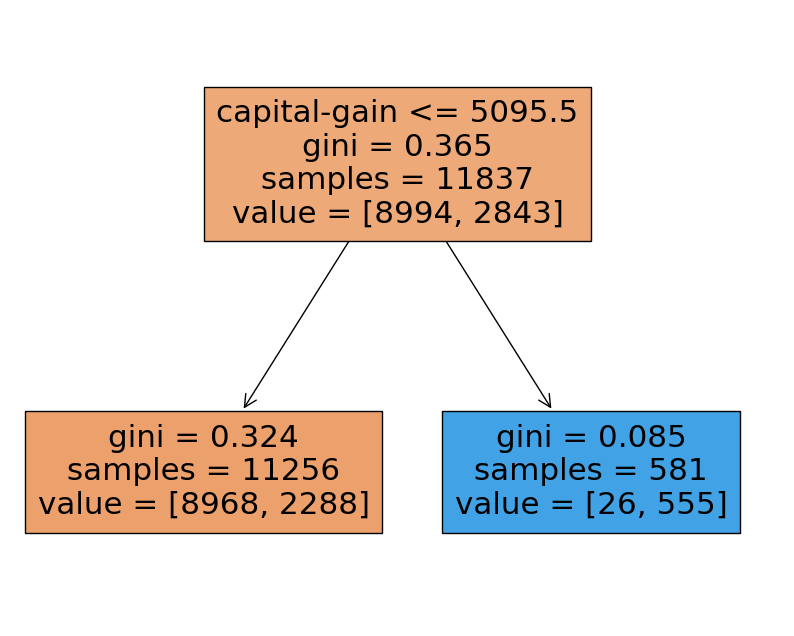

In [68]:
displayTree(cart_classifier, X)

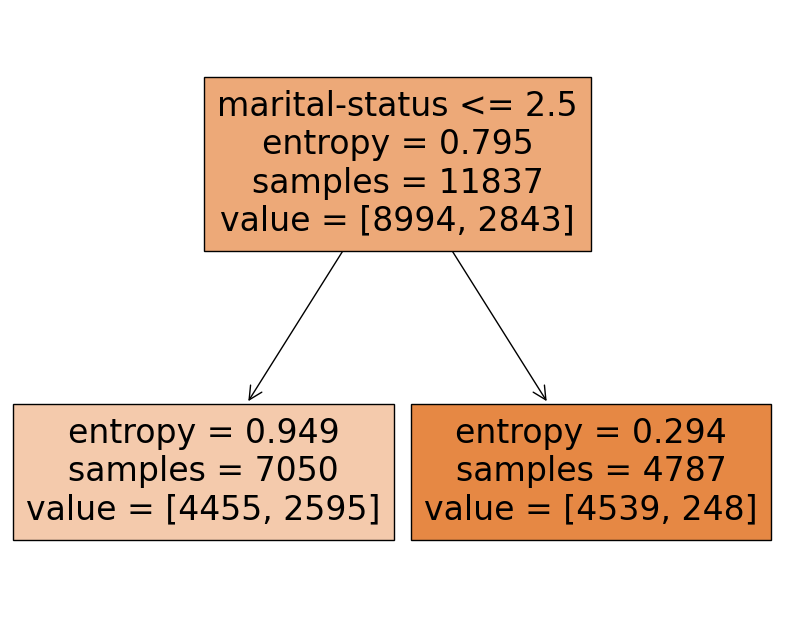

In [69]:
displayTree(c5_classifier, X)

[[2238   11]
 [ 583  128]]


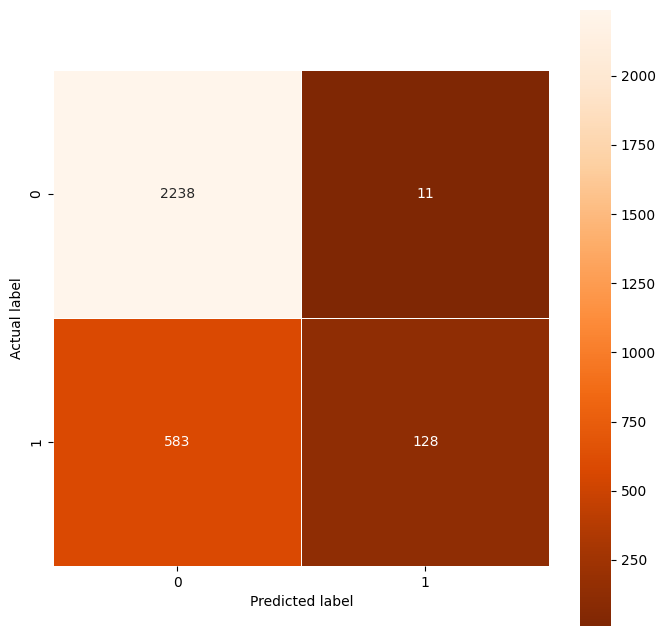

In [118]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

[[2249    0]
 [ 711    0]]


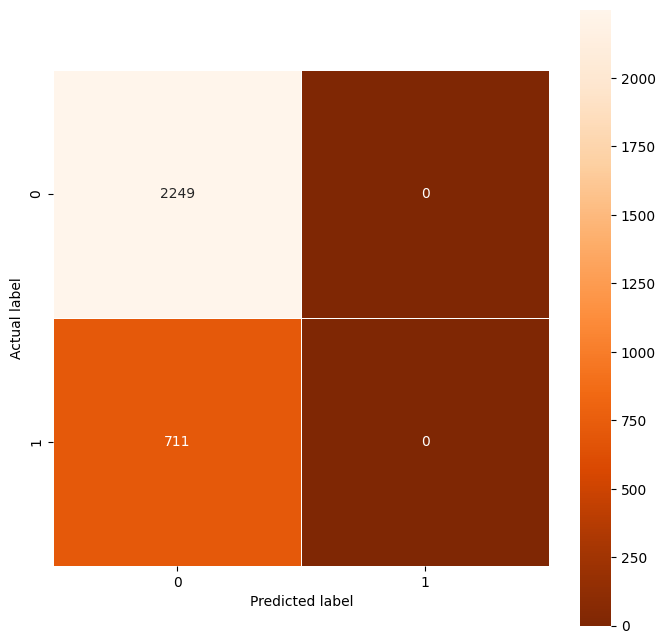

In [119]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

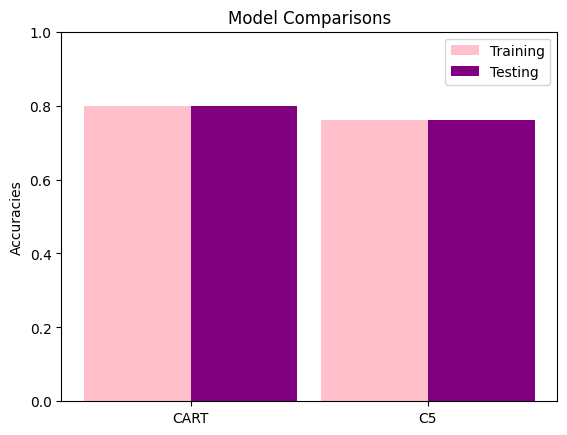

In [108]:
compareModels(cart_classifier, c5_classifier)

#Summary

After testing values for leafs, depth of 2,1 None,None, and 4,2 I can confidently say that inputting values of None, None is extremely bad for time efficiency, and also makes for a very hard-to-read tree--you could even call it unreadable.
The best performing values, for me, were 4 and 2. All of the functions took under a second compared to the average of around a second for 2 and 1, and *two minutes* for None and None.
